<a href="https://colab.research.google.com/github/FaisAkbar/PembelajaranMesin/blob/main/OCRKTP_Kelompok_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 2 - OCRKTP
### Nama Anggota Kelompok :
* DWI PAGA AYUBA (8 - 2141720251)
* FAWAA’EL AKBAR FIRDAUS (10 - 2141720215)
* MUHAMMAD ASADILLAH RAMADHAN (22 - 2141720093)
* MUHAMMAD SYAHIDAN NURON JIHADIN (25 - 2141720095)
* RAMBIMO REGENG PANGESTU (27 - 2141720094)

##### Link Github :
https://github.com/FaisAkbar/PembelajaranMesin/blob/main/OCRKTP_Kelompok_2.ipynb



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt install tesseract-ocr-ind
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (3,192 kB/s)
debconf: unable to ini

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [ ]:
IMG_DIR = '/content/drive/MyDrive/KTP/'

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

def scale_data(image):
    h, w, ch = image.shape
    data = image / 255.0
    data = data.reshape(h * w, ch)
    return data

def reverse_scale_data(image, original):
    h, w, ch = original.shape
    data = np.round(image * 255.0).astype(np.uint8)
    data = data.reshape(h, w, ch)
    return data

def kmeans_cluster(original):
    data = scale_data(original)
    kmeans = KMeans(2,n_init=3)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    new_colors = reverse_scale_data(new_colors, original)
    return new_colors

In [ ]:
image = cv2.imread(IMG_DIR + '22_Muhammad Asadillah Ramadhan.jpg')

In [ ]:
kmeans = kmeans_cluster(image.copy())
gray = get_grayscale(kmeans.copy())
blur = cv2.GaussianBlur(gray.copy(), (3,3), 0)
adaptive = cv2.adaptiveThreshold(blur.copy(), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

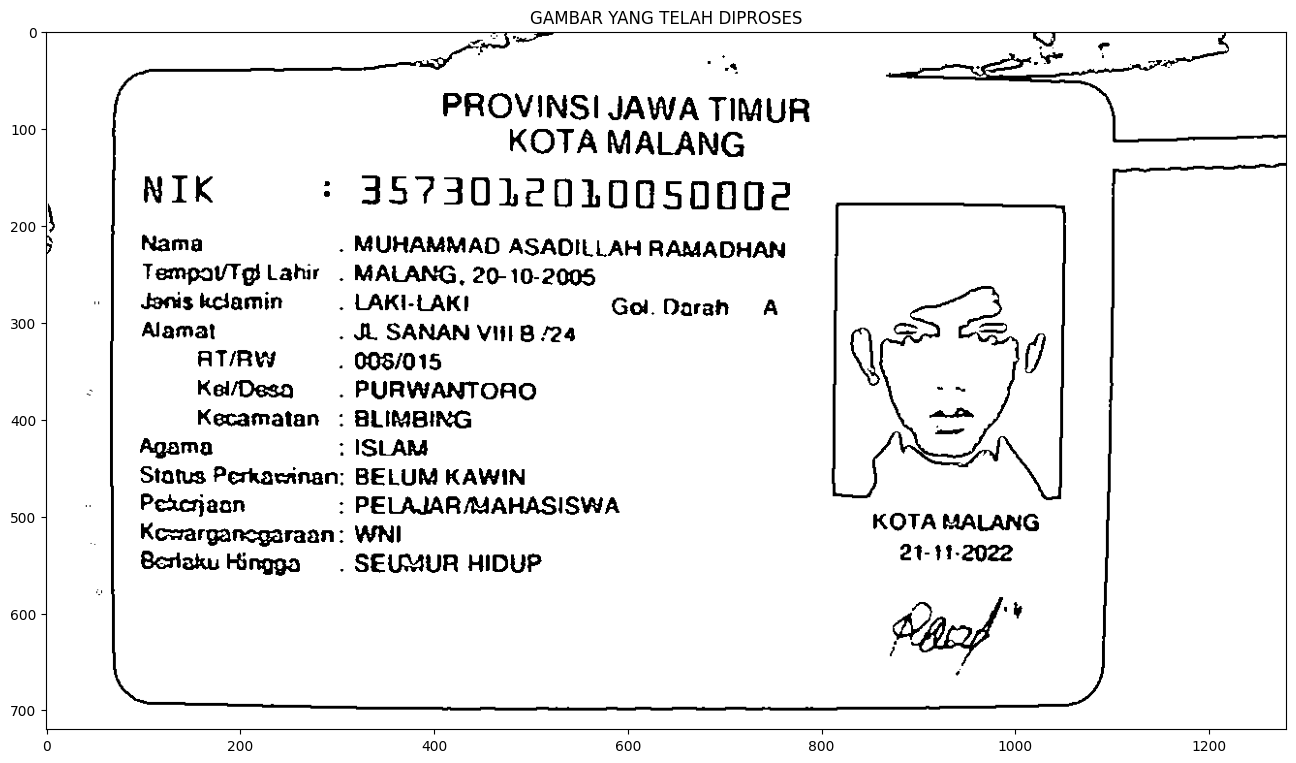

In [ ]:
plt.figure(figsize=(16, 12))
plt.imshow(adaptive, cmap='gray')
plt.title('GAMBAR YANG TELAH DIPROSES')
plt.show()

In [ ]:
custom_config = r'-l ind --oem 3 --psm 6'
data = pytesseract.image_to_string(gray, config=custom_config)
data = data.split('\n')

In [ ]:
content = {}
element = ['PROVINSI', 'KOTA', 'KABUPATEN', 'NIK', 'Nama', 'Lahir', 'Jenis', 'Darah', 'Alamat', 'RW', 'Desa', 'Kecamatan', 'Agama', 'Status', 'Pekerjaan', 'Kewarganegaraan', 'Berlaku']
validation = [False] * len(element)
for i in range(len(data)):
  for j in range (len(element)):
    if element[j] in data[i]:
      if(validation[j] == False):
        content[element[j]] = data[i]
        validation[j] = True

In [ ]:
print(content)

{'PROVINSI': 'PROVINSI JAWA TIMUR an', 'KOTA': 'KOTA MALANG', 'NIK': 'NIK : 3573012010059002', 'Nama': 'Nama MUHAMMAD ASADILLAH RAMADHAN', 'Lahir': 'Tempet/Tg Lahir . MALANG, 20-10-2995', 'Jenis': 'Jenis kelamin . LAKI-LAKI Gol. Darah A', 'Darah': 'Jenis kelamin . LAKI-LAKI Gol. Darah A', 'Alamat': 'Alamat . JL SANAN VIII 8 /24 1 pa at /', 'RW': 'AT/RW . 006/015 , 4', 'Desa': 'Kei/Desa PURWANTORO', 'Kecamatan': 'Kecamatan : BLIMBING', 'Agama': 'Agama : ISLAM', 'Status': 'Status Perkawinan: BELUM KAWIN', 'Pekerjaan': 'Pekerjaan PELAJAR/MAHASISWA KOTA MALANG', 'Kewarganegaraan': 'Kewarganegaraan: WNI 21-11-2922', 'Berlaku': 'Berlaku Hingga —. SEUMUR HIDUP'}
